In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df

In [10]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

# Filtrar outliers
for col in ["height", "weight", "ap_hi", "ap_lo", "BMI"]:
    df = filtrar_outliers(df, col)

# Bosques aleatorios

In [11]:
# Definir variables predictoras (X) y objetivo (y)
X = df.drop(columns=["cardio", "age"])   # usamos age_years en lugar de age
y = df["cardio"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(      # stratify=y → preserva la distribución de la variable objetivo en ambos conjuntos
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # número de árboles
    max_depth=None,        # profundidad ilimitada (puede ajustarse)
    random_state=42,
    n_jobs=-1              # usa todos los núcleos disponibles
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# Evaluar el modelo
y_pred = rf.predict(X_test)

print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print ("Precisión del modelo:", rf.score(X_test, y_test))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud del modelo: 0.7122920021470747
Precisión del modelo: 0.7122920021470747
Matriz de confusión:
 [[4725 1831]
 [1921 4564]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6556
           1       0.71      0.70      0.71      6485

    accuracy                           0.71     13041
   macro avg       0.71      0.71      0.71     13041
weighted avg       0.71      0.71      0.71     13041



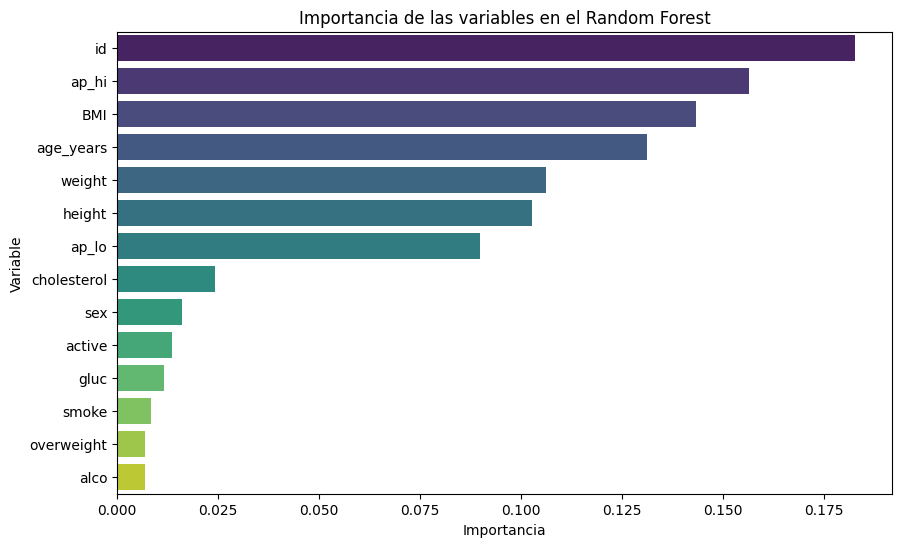

In [16]:
# Importancia de las variables
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=features.values, y=features.index, palette="viridis", hue=features.index, dodge=False,  legend=False)
plt.title("Importancia de las variables en el Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()
